Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!mkdir data/
!wget https://raw.githubusercontent.com/ArushiiGupta/aiml_course_data/main/polyester_ln_dataset.csv

--2024-04-25 17:07:57--  https://raw.githubusercontent.com/ArushiiGupta/aiml_course_data/main/polyester_ln_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164004 (160K) [text/plain]
Saving to: ‘polyester_ln_dataset.csv’

polyester_ln_datase 100%[===================>] 160.16K  --.-KB/s    in 0.02s   

2024-04-25 17:07:57 (9.29 MB/s) - ‘polyester_ln_dataset.csv’ saved [164004/164004]



Reading the Polyester yield dataset.

In [4]:
Arushi_df = pd.read_csv('/content/polyester_ln_dataset.csv')
Arushi_df.head()

,Inlet Flow Rate of Diol,Inlet Flow Rate of Dicarboxylic Acid,Concentration of Diol (ethylene glycol),Concentration of Dicarboxylic Acid (terephthalic acid),Inlet Temperature,Pressure Inside Reactor,Agitation Speed,pH Level,Polyester Yield
0,47.490802,33.702659,4.523411,4.345406,61.439918,18.936355,314.825695,6.077599,87.287891
1,59.014286,40.838019,4.493958,4.593363,66.108647,19.734357,267.238636,6.373545,98.017425
2,54.639879,47.458917,5.812509,3.500936,65.203219,23.545474,337.239456,7.662492,101.514278
3,51.973170,44.644498,4.499092,4.249748,53.077998,18.400044,311.311624,7.533537,93.516730
4,43.120373,46.131223,4.543899,4.143492,52.984989,23.696497,265.720388,6.701285,84.468653


In [5]:
df = Arushi_df.copy()
Arushi_df.describe()

,Inlet Flow Rate of Diol,Inlet Flow Rate of Dicarboxylic Acid,Concentration of Diol (ethylene glycol),Concentration of Dicarboxylic Acid (terephthalic acid),Inlet Temperature,Pressure Inside Reactor,Agitation Speed,pH Level,Polyester Yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.805131,40.140346,5.004811,3.980750,59.882106,19.984645,299.330884,6.964741,91.047013
std,5.842747,5.843798,0.581348,0.572979,5.736199,2.891948,28.973364,0.569829,5.921323
min,40.092640,30.064365,4.000023,3.001307,50.000614,15.061838,250.142834,6.000482,73.519964
25%,44.719465,34.821485,4.522702,3.483802,54.899480,17.493800,274.022166,6.471979,87.000032
50%,49.936148,40.374678,5.001228,3.968559,59.891962,19.904028,298.464302,6.967981,90.925644
75%,54.886392,45.209301,5.518207,4.475082,64.799869,22.398518,325.646435,7.428933,95.195680
max,59.994353,49.988275,5.995642,4.999115,69.954988,24.993503,349.946068,7.997809,107.928994


Checking for Null values in the dataset

In [15]:
df.isnull().sum()

Inlet Flow Rate of Diol                                   0
Inlet Flow Rate of Dicarboxylic Acid                      0
Concentration of Diol (ethylene glycol)                   0
Concentration of Dicarboxylic Acid (terephthalic acid)    0
Inlet Temperature                                         0
Pressure Inside Reactor                                   0
Agitation Speed                                           0
pH Level                                                  0
Polyester Yield                                           0
dtype: int64

Performing univariate and bivariate analysis on the dataset ( These analyses help in gaining insights into the dataset, identifying patterns, outliers, and relationships between variables, which can be useful for further data preprocessing and model building ).

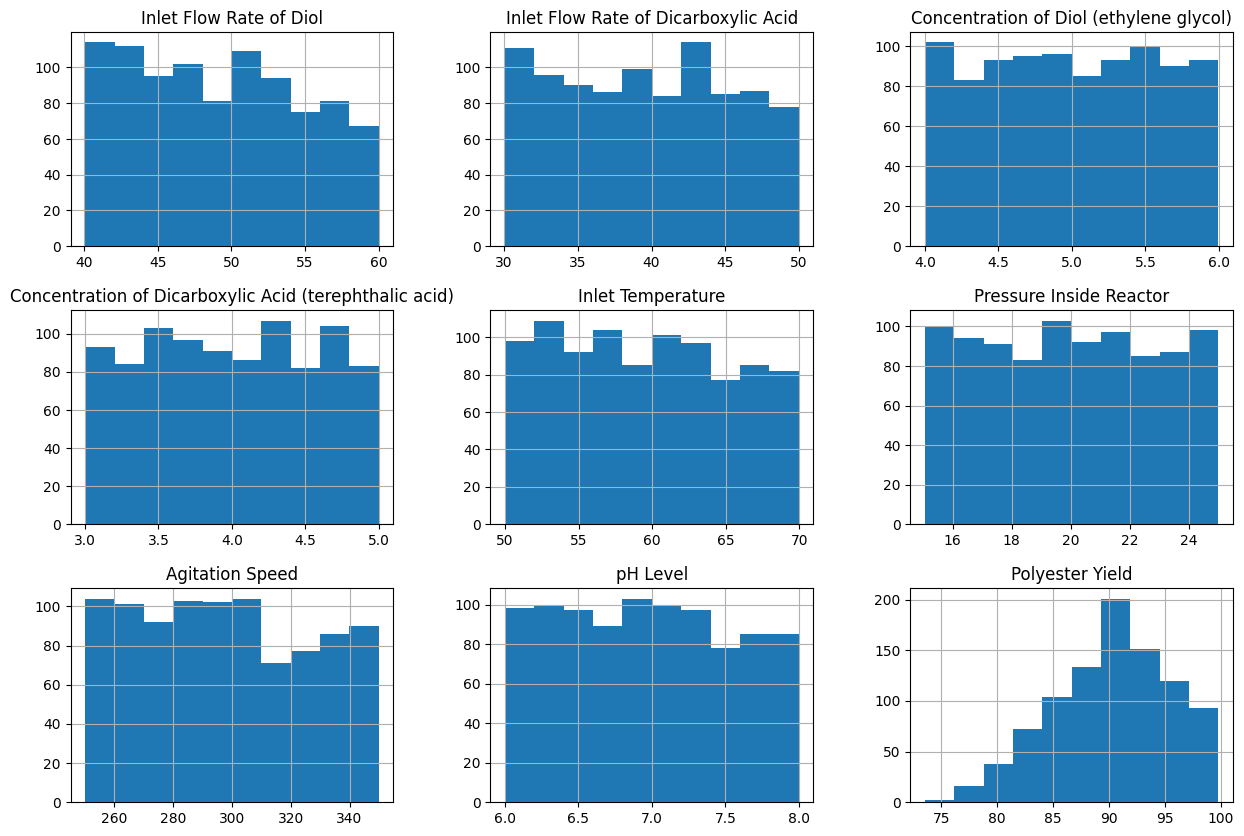

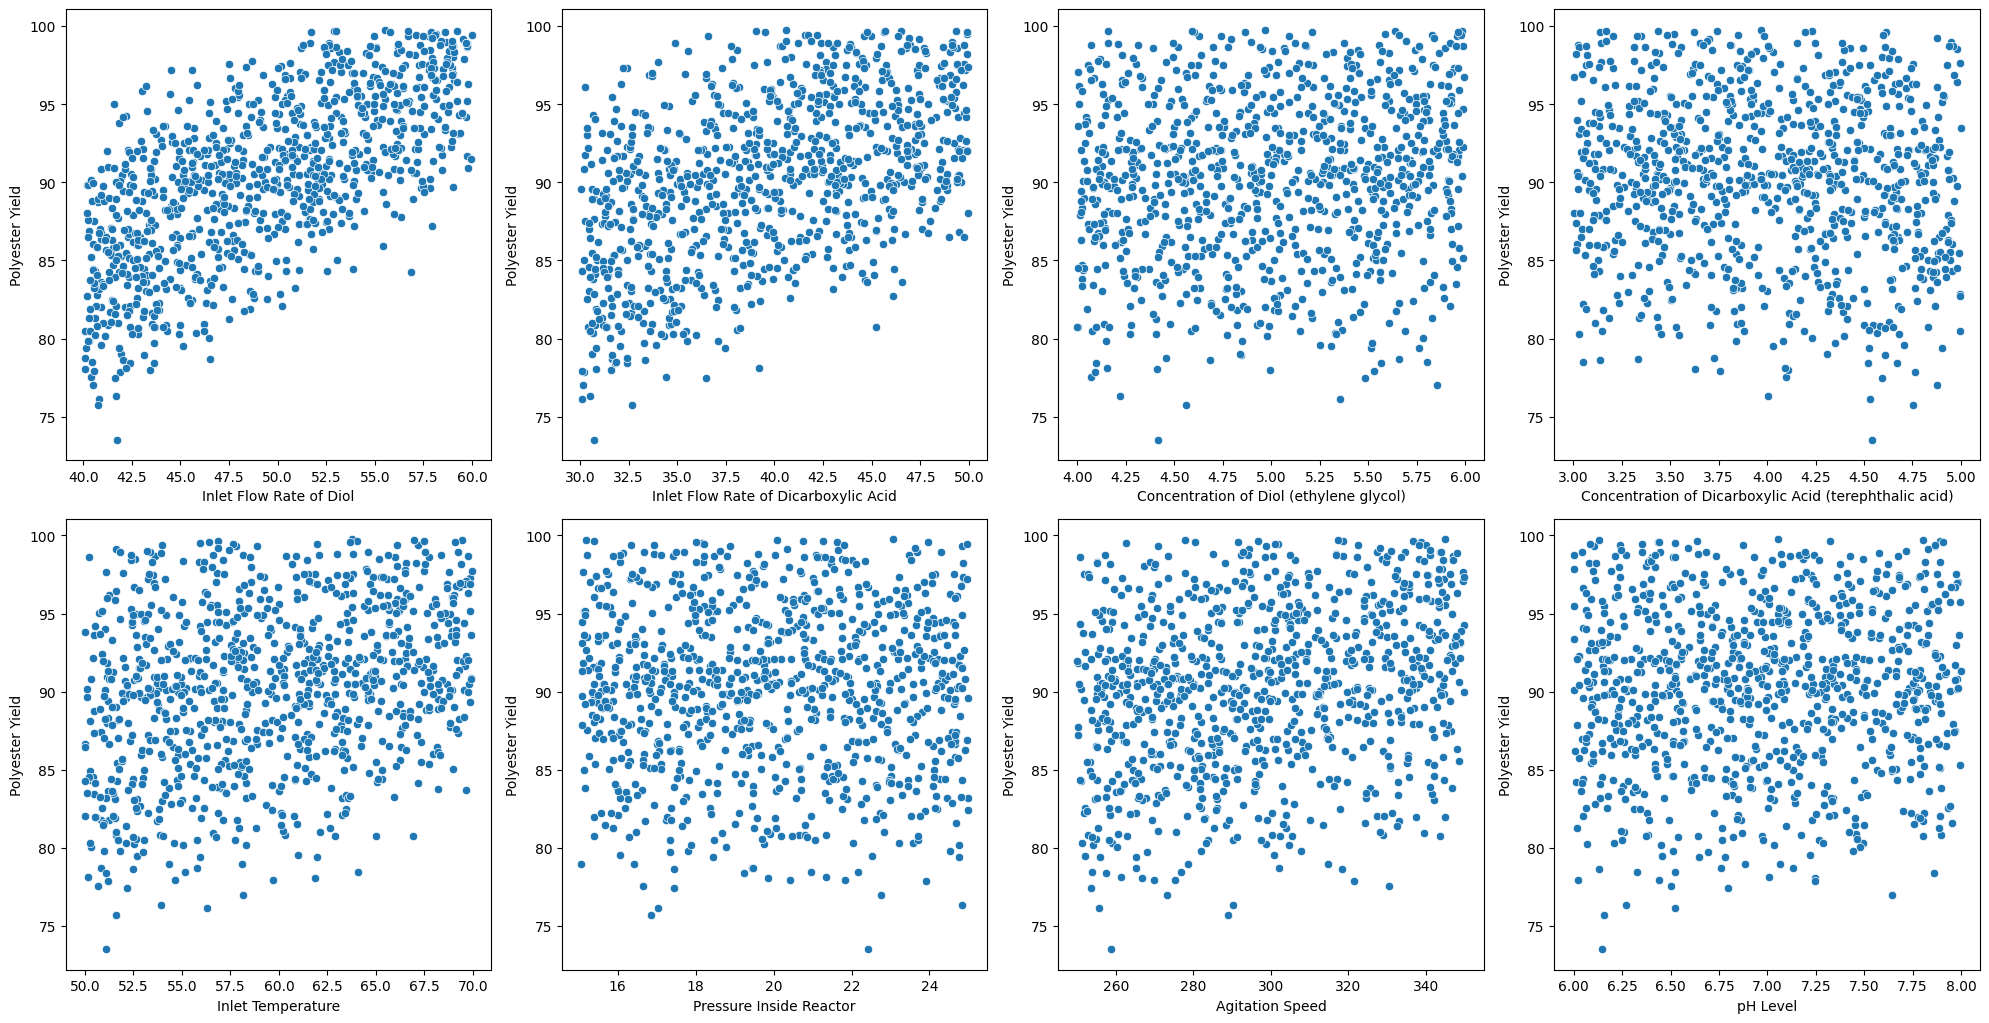

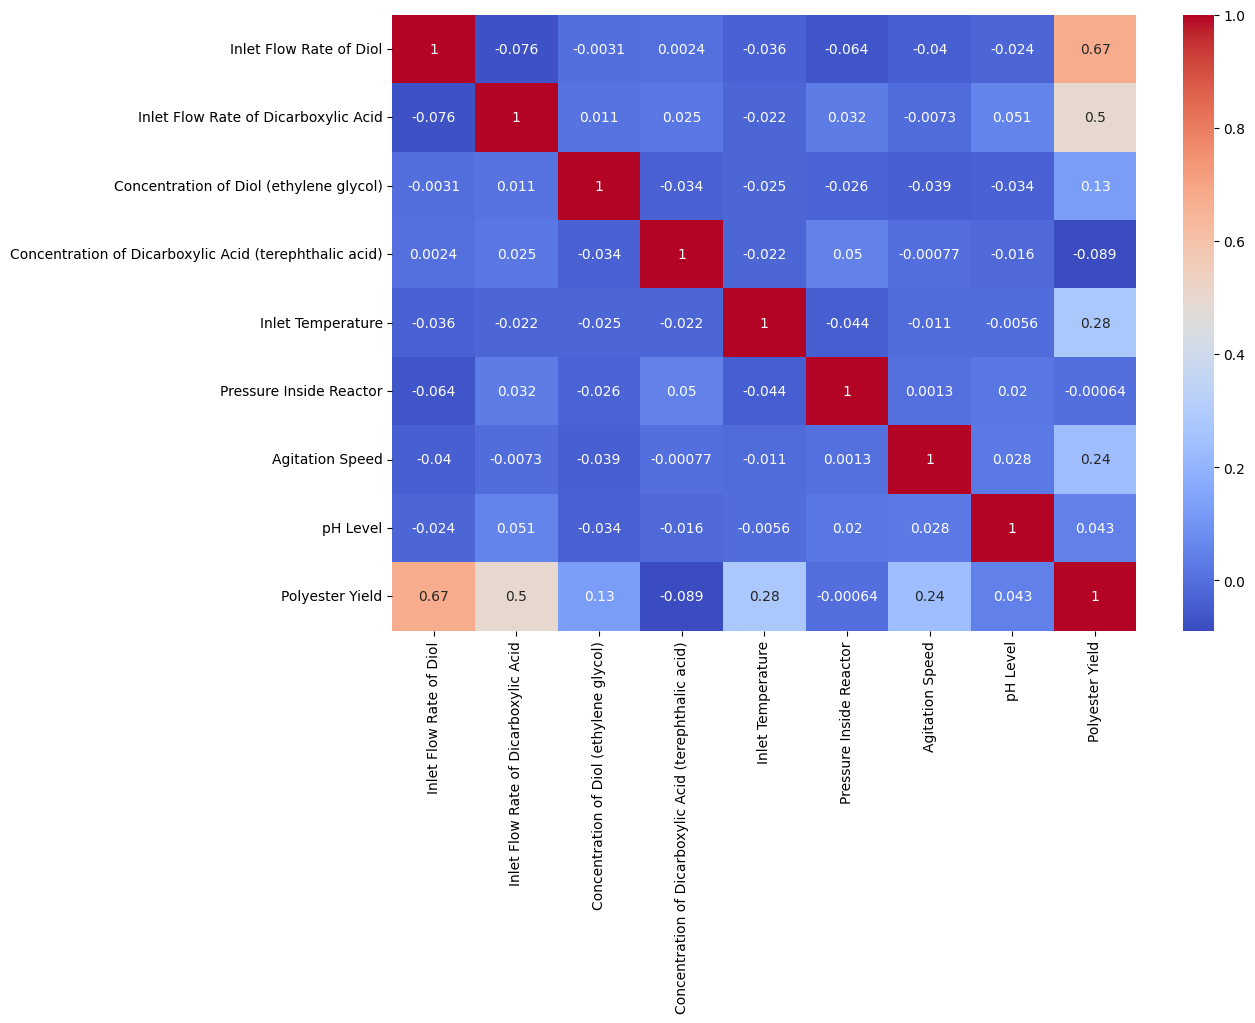

In [31]:
# Univariate Analysis
# Histograms for each numerical feature
df.hist(figsize=(15, 10))
plt.show()

# Bivariate Analysis
# Scatter plots for relationship between features and 'Polyester Yield'
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=col, y='Polyester Yield', data=df)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Removing the outliers from the dataset

In [6]:
from scipy import stats
# Calculate Z-scores for each column
z_scores = stats.zscore(df)

# Define a threshold to identify outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Find and remove rows containing outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Print the number of rows removed
print("Number of rows removed:", len(df) - len(df_no_outliers))

df=df_no_outliers

Number of rows removed: 0


Removing rows whose Polyester Yield is greater than 100 as yield percentage cannot be greater than 100

In [18]:
#Remove rows whose Polyester Yield is greater than 100
df = df[df['Polyester Yield'] <= 100]

Description shows that outliers have been removed and daatset has been cleaned

In [19]:
df.describe()

,Inlet Flow Rate of Diol,Inlet Flow Rate of Dicarboxylic Acid,Concentration of Diol (ethylene glycol),Concentration of Dicarboxylic Acid (terephthalic acid),Inlet Temperature,Pressure Inside Reactor,Agitation Speed,pH Level,Polyester Yield
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,49.244846,39.681391,4.995607,3.995948,59.565883,19.986237,297.828845,6.965235,90.207205
std,5.645245,5.756300,0.582073,0.570379,5.706101,2.895529,28.674031,0.569525,5.234139
min,40.092640,30.064365,4.000023,3.001307,50.000614,15.061838,250.142834,6.000482,73.519964
25%,44.205824,34.563470,4.515721,3.501924,54.605311,17.462719,273.244270,6.473485,86.667632
50%,49.057284,39.737309,4.992954,3.983631,59.330181,19.915107,296.408004,6.964780,90.498194
75%,53.868703,44.427073,5.507657,4.484201,64.395952,22.403930,322.524060,7.429247,94.191126
max,59.994353,49.966950,5.995642,4.999115,69.954988,24.993503,349.946068,7.997809,99.768114


Scaling the data

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target variable (y)
X = df.drop('Polyester Yield', axis=1)
y = df['Polyester Yield']

# Min-max scaling on X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
X_scaled_df.head()

,Inlet Flow Rate of Diol,Inlet Flow Rate of Dicarboxylic Acid,Concentration of Diol (ethylene glycol),Concentration of Dicarboxylic Acid (terephthalic acid),Inlet Temperature,Pressure Inside Reactor,Agitation Speed,pH Level
0,0.371735,0.182609,0.262269,0.672787,0.573273,0.390118,0.648104,0.038610
1,0.950755,0.540740,0.247509,0.796901,0.807243,0.470467,0.171295,0.186781
2,0.730954,0.873049,0.908233,0.250089,0.761868,0.854201,0.872683,0.832117
3,0.596960,0.731791,0.250082,0.624905,0.154221,0.336117,0.612894,0.767553
4,0.152134,0.806411,0.272535,0.571719,0.149560,0.869407,0.156083,0.350871


Splitting the dataset into training and testing sets for model evaluation.

In [8]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=13)

# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 8)
X_test shape: (300, 8)
y_train shape: (700,)
y_test shape: (300,)


Training different regression models and evaluating their performance using mean squared error (MSE) and R-squared (R^2) score.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest
rf_model = RandomForestRegressor(random_state=13)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=13)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# XGBoost
xgb_model = XGBRegressor(random_state=13)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)


# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=13)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

# Neural Network Regression
nn_model = MLPRegressor(random_state=13, max_iter=1000)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

# Display results
print("Random Forest - MSE:", rf_mse, "R^2:", rf_r2)
print("Decision Tree - MSE:", dt_mse, "R^2:", dt_r2)
print("XGBoost - MSE:", xgb_mse, "R^2:", xgb_r2)
print("Gradient Boosting - MSE:", gb_mse, "R^2:", gb_r2)
print("Neural Network Regression - MSE:", nn_mse, "R^2:", nn_r2)

Random Forest - MSE: 3.4282061388761638 R^2: 0.9101341256846869
Decision Tree - MSE: 8.562340895788171 R^2: 0.77554959660681
XGBoost - MSE: 3.2727975029249348 R^2: 0.9142079568314002
Gradient Boosting - MSE: 2.2323511369698865 R^2: 0.9414818775255017
Neural Network Regression - MSE: 14.501230441078672 R^2: 0.6198694887517548


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
def plot_predictions(model_name, y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f"{model_name} - Actual vs. Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Plotting actual vs. predicted values for each regression model

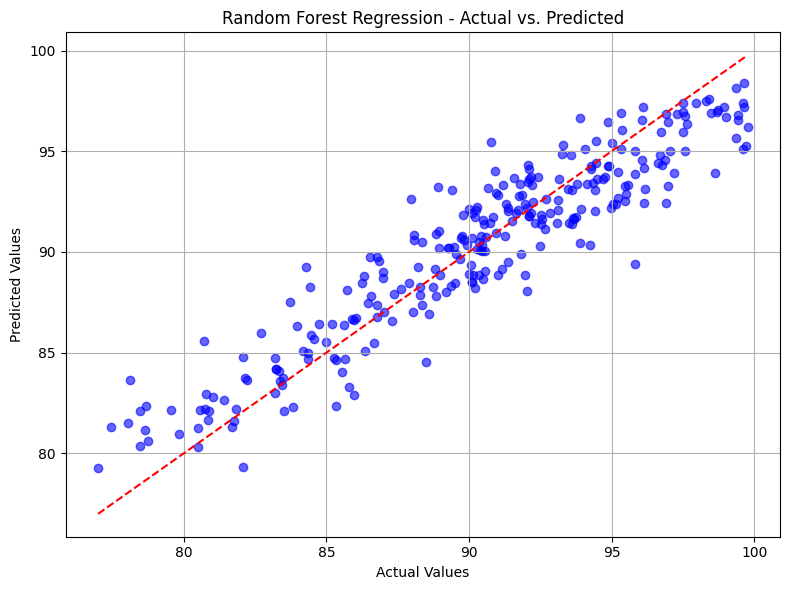

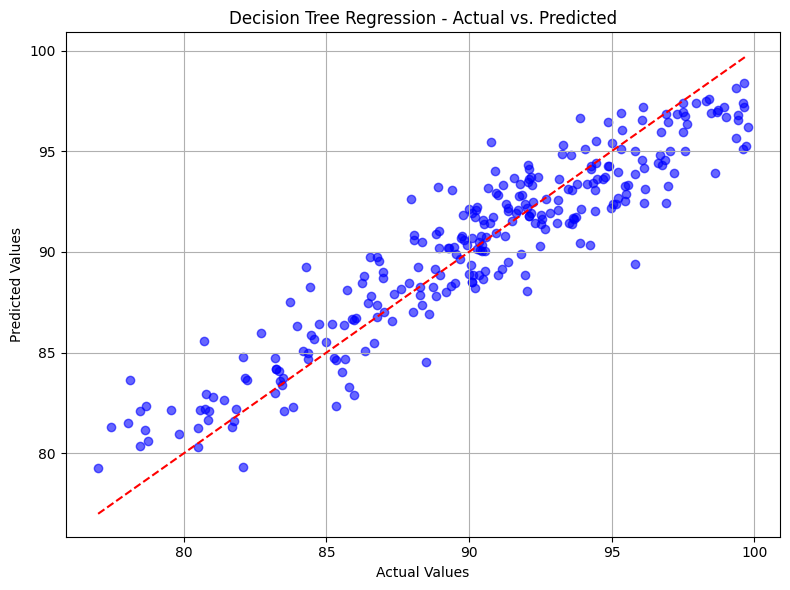

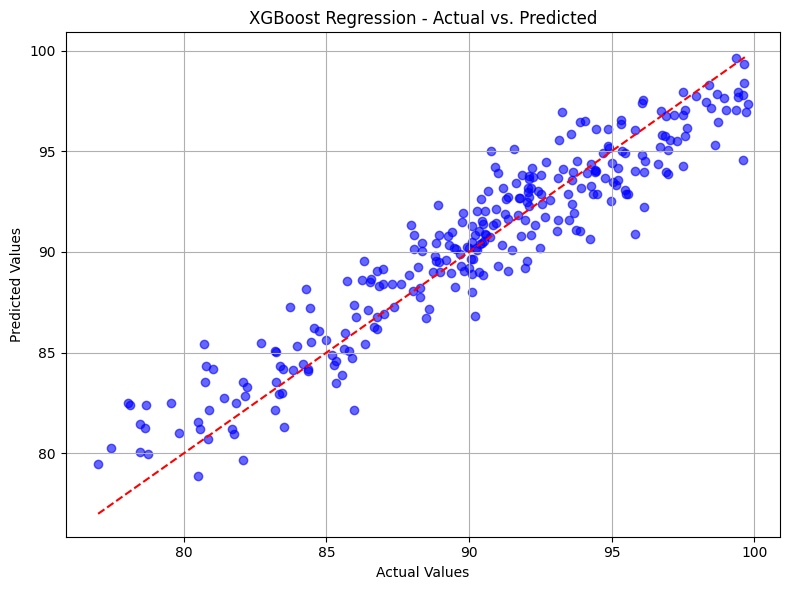

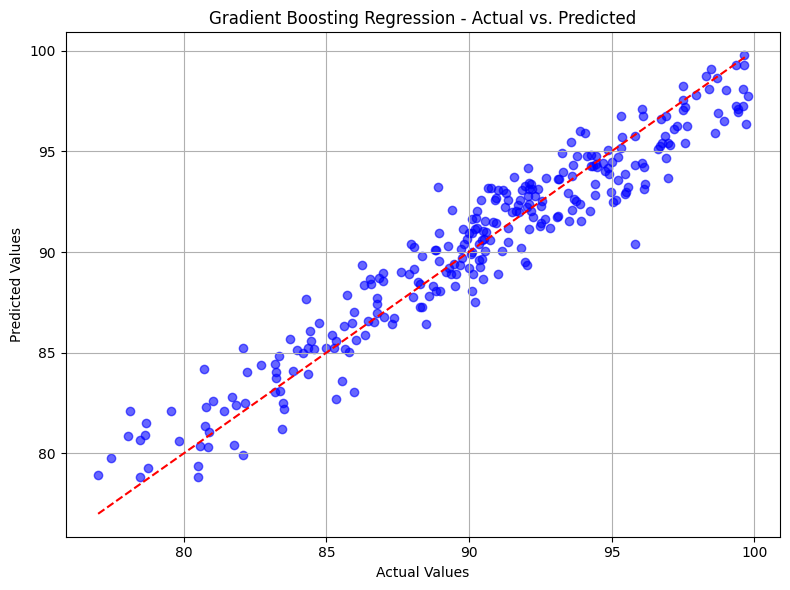

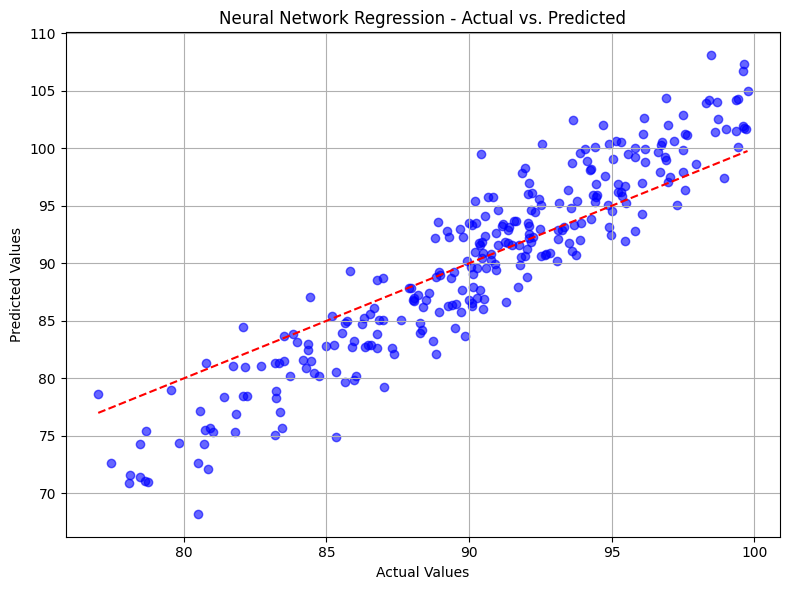

In [24]:
# Plot actual vs. predicted values for each regression model
plot_predictions("Random Forest Regression", y_test,rf_pred )
plot_predictions("Decision Tree Regression", y_test, rf_pred)
plot_predictions("XGBoost Regression", y_test, xgb_pred)
plot_predictions("Gradient Boosting Regression", y_test, gb_pred)
plot_predictions("Neural Network Regression", y_test, nn_pred)

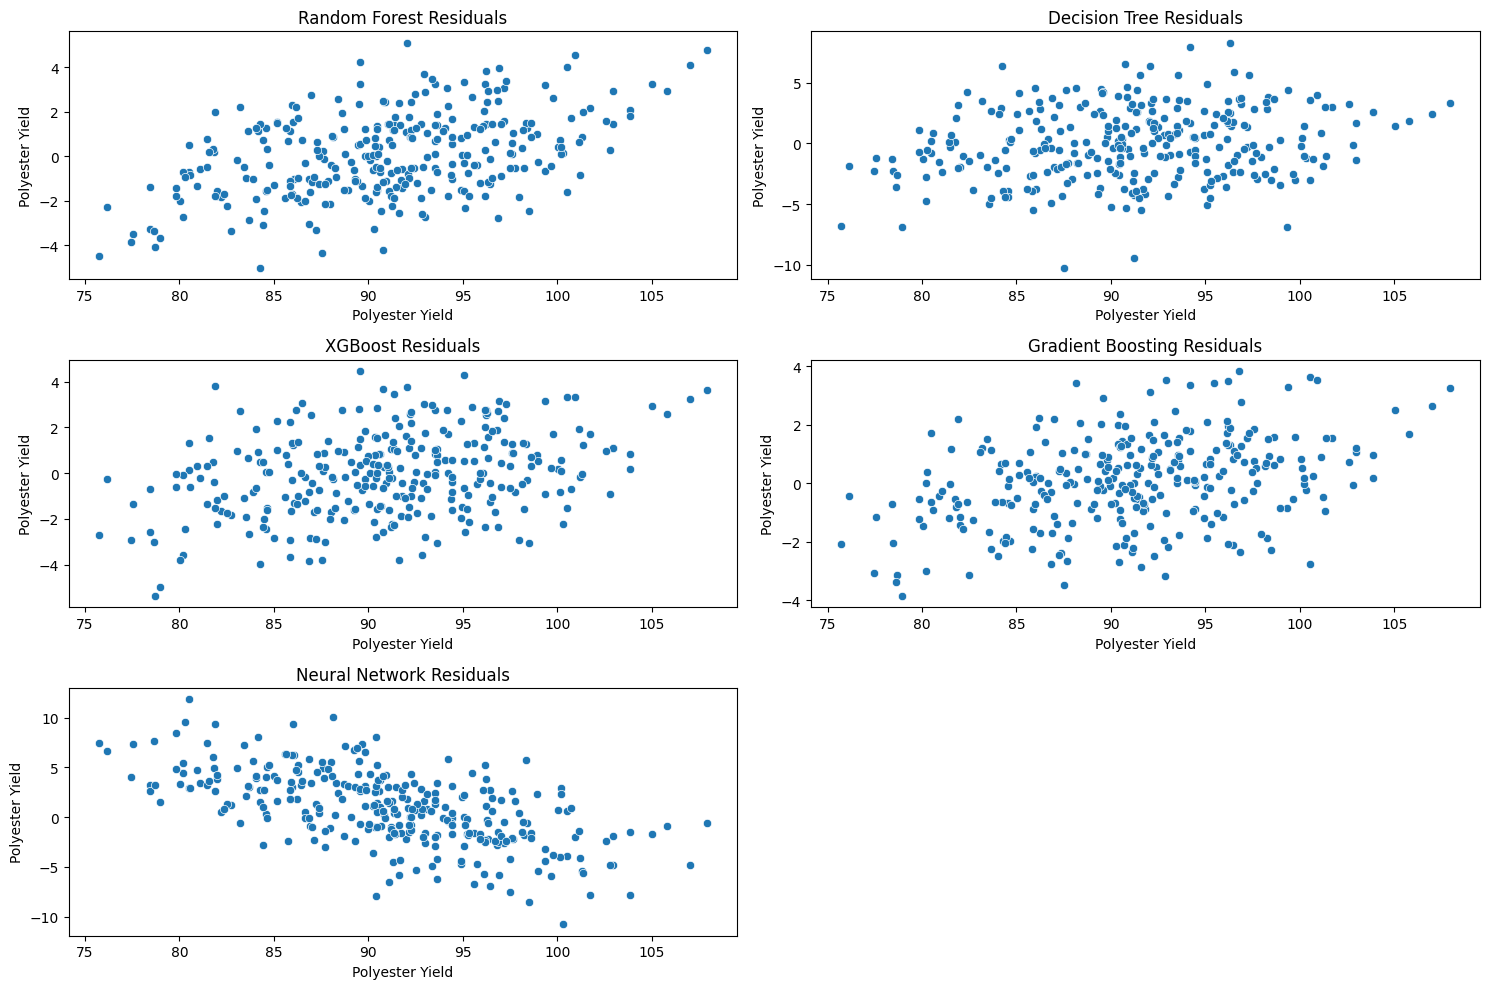

In [11]:
# Calculate residuals for each model
rf_residuals = y_test - rf_pred
dt_residuals = y_test - dt_pred
xgb_residuals = y_test - xgb_pred
gb_residuals = y_test - gb_pred
nn_residuals = y_test - nn_pred

# Plot residuals for each model
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.scatterplot(x=y_test, y=rf_residuals)
plt.title("Random Forest Residuals")

plt.subplot(3, 2, 2)
sns.scatterplot(x=y_test, y=dt_residuals)
plt.title("Decision Tree Residuals")

plt.subplot(3, 2, 3)
sns.scatterplot(x=y_test, y=xgb_residuals)
plt.title("XGBoost Residuals")

plt.subplot(3, 2, 4)
sns.scatterplot(x=y_test, y=gb_residuals)
plt.title("Gradient Boosting Residuals")

plt.subplot(3, 2, 5)
sns.scatterplot(x=y_test, y=nn_residuals)
plt.title("Neural Network Residuals")

plt.tight_layout()
plt.show()

Performing hyperparameter tuning for the Gradient Boosting model using GridSearchCV to improve its performance.

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'subsample': [0.6, 0.7, 0.8],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=13), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
best_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Model - MSE:", best_mse, "R^2:", best_r2)

Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 200, 'subsample': 0.6}
Best Model - MSE: 1.8693028657585364 R^2: 0.9509987061493972


Performing hyperparameter tuning for the Gradient Boosting model using GridSearchCV with KFold cross-validation to further improve its performance.

In [26]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, KFold

# Define the hyperparameter grid
param_grid = {
    'subsample': [0.6, 0.7, 0.8],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
}

# Create the KFold object
kfold = KFold(n_splits=5)

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=13), param_grid, cv=kfold)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
best_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_pred)
best_r2 = r2_score(y_test, best_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Model - MSE:", best_mse, "R^2:", best_r2)


Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 200, 'subsample': 0.6}
Best Model - MSE: 1.8761210958281063 R^2: 0.9342192496412083
